# UN Data Analysis

Analysis on UN Data comparing gdp per capita and internet usage

#### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

####  Formatting

In [2]:
%matplotlib inline

#### Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first 6 rows.

In [3]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv', nrows=6729)
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN


#### internet_df and the first six rows.

In [4]:
internet_df = pd.read_csv('../data/internet_use.csv',  nrows=4495)
internet_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


#### Examine shapes of dataframes. Numbers of columns and rows

In [5]:
gdp_df.shape ## 6731 rows and 4 columns

(6729, 4)

In [6]:
internet_df.shape ## 4675 rows and 4 columns

(4495, 4)

#### Examine data types for the columns in each table

In [7]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [8]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

#### Examine last 10 rows of each table

In [9]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6719,Zimbabwe,1999,3054.064189,NaN
6720,Zimbabwe,1998,3099.076182,NaN
6721,Zimbabwe,1997,3036.422224,NaN
6722,Zimbabwe,1996,2985.856605,NaN
6723,Zimbabwe,1995,2736.486436,NaN
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


In [10]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


#### Drop the 'value footnotes' data (column) from both datasets

In [11]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])

In [12]:
gdp_df.columns

Index(['Country or Area', 'Year', 'Value'], dtype='object')

In [13]:
internet_df = internet_df.drop(columns = ['Value Footnotes'])

In [14]:
internet_df.columns

Index(['Country or Area', 'Year', 'Value'], dtype='object')

#### Change the columns for the GDP Per Capita data frame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’

In [15]:
gdp_df.columns = ['Country','Year','GDP_Per_Capita']

In [16]:
gdp_df.columns

Index(['Country', 'Year', 'GDP_Per_Capita'], dtype='object')

In [17]:
#### change datatype to int in column year in gdp_df

gdp_df = gdp_df.astype({"Year": int})


#### Change the columns for the Internet Users data frame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’

In [18]:
internet_df.columns = ['Country','Year','Internet_Users_Pct']

In [19]:
internet_df.columns

Index(['Country', 'Year', 'Internet_Users_Pct'], dtype='object')

#### Merge the two DataFrames to one. Merge all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use

In [20]:
df = pd.merge(gdp_df, internet_df, on=['Country', 'Year'], how = 'outer')

In [21]:
df.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,6.39


In [22]:
df.tail(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7700,Virgin Islands (U.S.),1997,NaN,6.948369
7701,Virgin Islands (U.S.),1996,NaN,4.647186
7702,Virgin Islands (U.S.),1995,NaN,2.801958
7703,Virgin Islands (U.S.),1994,NaN,0.940645
7704,Virgin Islands (U.S.),1990,NaN,0.000000


#### Subset the combined data frame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.



In [23]:
df2004 = df[df["Year"] == 2004]


In [24]:
df2009 = df[df["Year"] == 2009]

In [25]:
df2014 = df[df["Year"] == 2014]

In [26]:
# combine three years data
frame3 = [df2004, df2009, df2014]
df3 = pd.concat(frame3)
df3.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
14,Afghanistan,2004,1025.208245,0.105809
31,Albania,2004,7001.054082,2.420388
60,Algeria,2004,11845.170512,4.634475
89,Angola,2004,4604.657044,0.464815
118,Antigua and Barbuda,2004,21161.123532,24.266544


#### Which country had the highest percentage of internet users in 2014? What was the percentage? (Try typing the first 3 letters of your DataFrame name and hitting the tab for auto-complete options).

In [27]:
## df2014 = df2014.reset_index(drop=True) ##reset index needed?

In [28]:
(df2014[df2014.Internet_Users_Pct == df2014.Internet_Users_Pct.max()]) 

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2581,Iceland,2014,42774.888849,98.16


#### Which country had the lowest percentage of internet users in 2014? What was the percentage?

In [29]:
(df2014[df2014.Internet_Users_Pct == df2014.Internet_Users_Pct.min()]) 

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6940,Dem. People's Rep. of Korea,2014,NaN,0.0


#### 2004 and 2009 Highest and lowest internet users and country names

In [30]:
print(df2004[df2004.Internet_Users_Pct == df2004.Internet_Users_Pct.max()]) 
print(df2004[df2004.Internet_Users_Pct == df2004.Internet_Users_Pct.min()]) 
print(df2009[df2009.Internet_Users_Pct == df2009.Internet_Users_Pct.max()]) 
print(df2009[df2009.Internet_Users_Pct == df2009.Internet_Users_Pct.min()]) 

     Country  Year  GDP_Per_Capita  Internet_Users_Pct
5852  Sweden  2004    40177.850408               83.89
                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
6949  Dem. People's Rep. of Korea  2004             NaN                 0.0
      Country  Year  GDP_Per_Capita  Internet_Users_Pct
2586  Iceland  2009    41505.084834                93.0
                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
6944  Dem. People's Rep. of Korea  2009             NaN                 0.0


#### Which country had the highest and lowest gdp per capita in 2014? What were the gdp per capita?


In [31]:
print(df2014[df2014.GDP_Per_Capita == df2014.GDP_Per_Capita.max()]) 
print(df2014[df2014.GDP_Per_Capita == df2014.GDP_Per_Capita.min()])

               Country  Year  GDP_Per_Capita  Internet_Users_Pct
3639  Macao SAR, China  2014   130439.106674                 NaN
                       Country  Year  GDP_Per_Capita  Internet_Users_Pct
1014  Central African Republic  2014      672.681648                 NaN


#### Examine the relationship between Internet and GDP Per Capita
##### 2004 Percent Using the Internet vs GDP Per Capita

##### In 2004, the scatter plot shows there is a corelation between gdp per capita and internet users % and it is positive as the data upward sloping. 

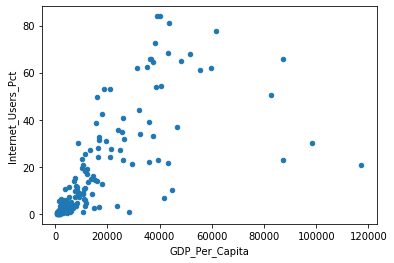

In [32]:
scatter2004 = df2004.plot.scatter( x = 'GDP_Per_Capita', y = 'Internet_Users_Pct')

##### 2009 Percent Using the Internet vs GDP Per Capita
##### In 2009, it shows a strong positive relationship between gdp per capita and internet usage as the slope is getting steeper. 

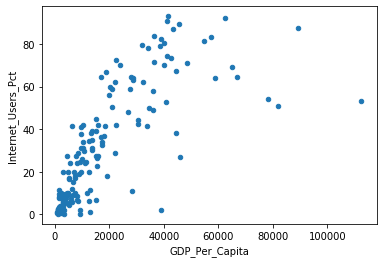

In [33]:
scatter2009 = df2009.plot.scatter( x = 'GDP_Per_Capita', y = 'Internet_Users_Pct')

##### 2014 Percent Using the Internet vs GDP Per Capita
##### Finally, looking at 2014, the positive relationship between gdp per capita and internet usages is the strongest among the years. As we can see in the plot, the slope is the steepest. With increasing years, there is a higher trend for internet usage when gdp per capita increases.  

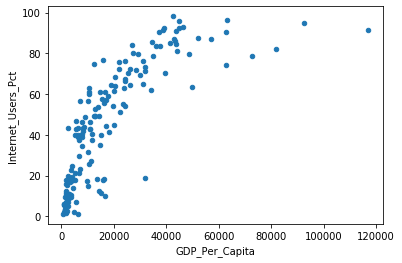

In [34]:
scatter2014 = df2014.plot.scatter( x = 'GDP_Per_Capita', y = 'Internet_Users_Pct')

##### Examine the distribution of gdp per capita values for 2014. Is it unimodal?
##### It is a unimodel. A unimodal distribution is a distribution with one clear peak or most frequent value. The values increase at first, rising to a single peak where they then decrease.Unimodal distributions aren’t necessarily symmetric like the normal distribution. They can be asymmetric, or they could be a skewed distribution. We can see from the graph that it is a left skewed graph with most gdp per capita near 0.

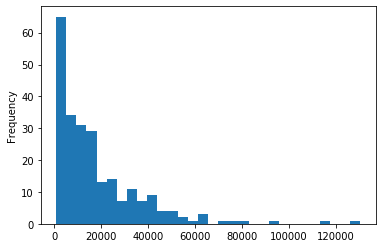

In [35]:
df2014['GDP_Per_Capita'].plot.hist(bins=30)

##### Examine distribution of Internet Use for 2014. Is it unimodal?
##### Internet use in 2014 is not unimodel. We can see it is a distribution with two peaks or more so it is a multimodal. 

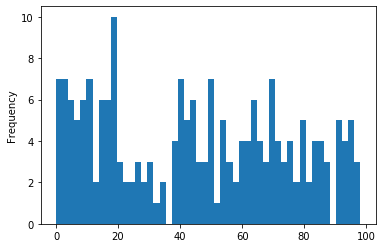

In [36]:
df2014['Internet_Users_Pct'].plot.hist(bins=50)

#### Top 5 countries with highest internet use in 2014

In [37]:
Top5internet_use2014 = df2014.nlargest(5, 'Internet_Users_Pct') 
Top5internet_use2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2581,Iceland,2014,42774.888849,98.16
6772,Bermuda,2014,NaN,96.80
4530,Norway,2014,63328.259526,96.30
1404,Denmark,2014,45057.083449,95.99
6732,Andorra,2014,NaN,95.90


##### Create a new dataframe from top 5 countries with  top internet use in 2014 and combine with 2004,2009

In [38]:
# Create a filter for extracting the top 5 countries
filter = df3["Country"].isin(["Iceland", "Bermuda", "Norway","Denmark","Andorra" ])

# displaying data with both filter applied 
Top5internet_use = df3[filter]
Top5internet_use = Top5internet_use.sort_values("Year")
Top5internet_use.tail(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1404,Denmark,2014,45057.083449,95.99
2581,Iceland,2014,42774.888849,98.16
4530,Norway,2014,63328.259526,96.30
6732,Andorra,2014,NaN,95.90
6772,Bermuda,2014,NaN,96.80


#### Create a seaborn FacetGrid to show the internet usage trend over time for these 5 countries (those with the highest reported internet use in 2014). Which country had the greatest growth between 2004 and 2014? Is there a plotting issue with Bermuda? Can you fix it?

##### Andorra has the greatest growth between 2004 and 2014 as the slope is the steepest. 

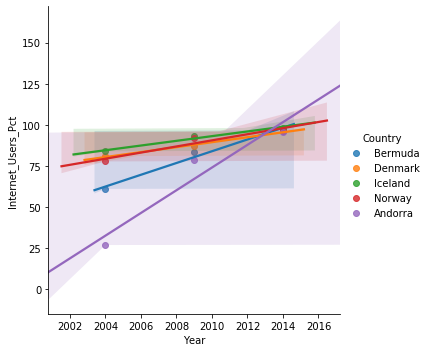

In [39]:
#fix nan values
Top5internet_use = Top5internet_use.fillna(0) 

sns.lmplot(x="Year", y="Internet_Users_Pct", hue="Country", data= Top5internet_use)

##### Top 5 countries with lowest internet use in 2014

In [40]:
Low5internet_use2014 = df2014.nsmallest(5, 'Internet_Users_Pct') 
Low5internet_use2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6940,Dem. People's Rep. of Korea,2014,NaN,0.00
6999,Eritrea,2014,NaN,0.99
6044,Timor-Leste,2014,6466.737732,1.14
794,Burundi,2014,768.469837,1.38
7521,Somalia,2014,NaN,1.63


##### Create a new dataframe from top 5 countries with low internet use in 2014 and combine with 2004,2009

In [41]:
# Create a filter for extracting the top 5 countries with lowest internet use
filter2 = df3["Country"].isin(["Dem. People's Rep. of Korea", "Eritrea", "Timor-Leste","Burundi","Somalia" ])

# displaying data with both filter applied 
Low5internet_use = df3[filter2]
Low5internet_use = Low5internet_use.sort_values("Year")
Low5internet_use.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
804,Burundi,2004,708.833720,0.349060
1727,Eritrea,2004,2317.349879,NaN
6054,Timor-Leste,2004,4898.575839,NaN
6949,Dem. People's Rep. of Korea,2004,NaN,0.000000
7530,Somalia,2004,NaN,1.053455


##### Examine the trend for the 5 countries with the lowest 2014 internet usage. Which country has consistently had the least internet use?

##### North Korea has the least internet use also know as Democratic People's Republic of Korea with 0 internet use. It is known the North Korea is a totalitarian country. The report of no internet in public is due to the censorship in North Korea ranking among some of the most extreme in the world, with the government able to take strict control over communications. 

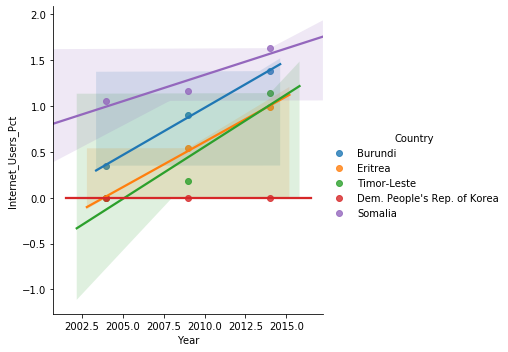

In [42]:
#fix nan values
Low5internet_use = Low5internet_use.fillna(0) 
sns.lmplot(x="Year", y="Internet_Users_Pct", hue="Country", data= Low5internet_use)

 #### Top 5 countries with highest GDP per capita in 2014

In [43]:
Top5gdp2014 = df2014.nlargest(5, 'GDP_Per_Capita') 
Top5gdp2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3639,"Macao SAR, China",2014,130439.106674,NaN
5003,Qatar,2014,116693.507701,91.49
3610,Luxembourg,2014,92349.186429,94.67
5316,Singapore,2014,81965.361071,82.00
707,Brunei,2014,76448.593329,NaN


#### Create a new dataframe from top 5 countries with top gdp per capita in 2014 and combine with 2004,2009

In [44]:
# Create a filter for extracting the top 5 countries with highest gdp per capita
filter3 = df3["Country"].isin(["Macao SAR, China", "Luxembourg", "Singapore","Qatar","Brunei" ])

# displaying data with both filter applied 
Top5gdp = df3[filter3]
Top5gdp = Top5gdp.sort_values(["Year", "Country"])
Top5gdp.tail(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
707,Brunei,2014,76448.593329,NaN
3610,Luxembourg,2014,92349.186429,94.67
3639,"Macao SAR, China",2014,130439.106674,NaN
5003,Qatar,2014,116693.507701,91.49
5316,Singapore,2014,81965.361071,82.00


#### Examine the 10-year trend for the 5 countries with the highest 2014 gdp per capita.

##### We can see that Macao has the highest growth in the past ten years, followed by Singapore. Brenei's growth dropped the most throughout the year with a downward slope. 

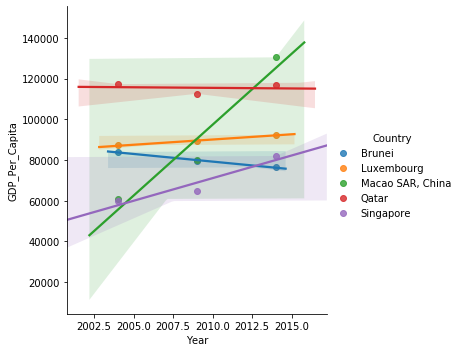

In [45]:
top5gdp = sns.lmplot(x="Year", y="GDP_Per_Capita", hue="Country", data= Top5gdp)

#### Top 5 countries with lowest GDP per capita in 2014

In [46]:
Low5gdp2014 = df2014.nsmallest(5, 'GDP_Per_Capita') 
Low5gdp2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1014,Central African Republic,2014,672.681648,NaN
794,Burundi,2014,768.469837,1.38
1375,Dem. Rep. Congo,2014,784.872656,NaN
4414,Niger,2014,900.136918,1.95
3697,Malawi,2014,1142.530804,5.83


#### Create a new dataframe from top 5 countries with top gdp per capita in 2014 and combine with 2004,2009

In [47]:
# Create a filter for extracting the top 5 countries with highest gdp per capita
filter4 = df3["Country"].isin(["Central African Republic", "Burundi", "Dem. Rep. Congo","Niger","Malawi" ])

# displaying data with both filter applied 
Low5gdp = df3[filter4]
Low5gdp = Low5gdp.sort_values(["Year", "Country"])
Low5gdp.shape

(15, 4)

#### Examine the 10-year trend for the 5 countries with the lowest 2014 gdp per capita.

##### Malawi and Congo show the greatest growth in gdp per capita in the last 10 years with very steep slopes compared to other countries.  Central African Republic's growth has been dropping in the past 10 years. Other countries are growing with a slighly upward slope.  

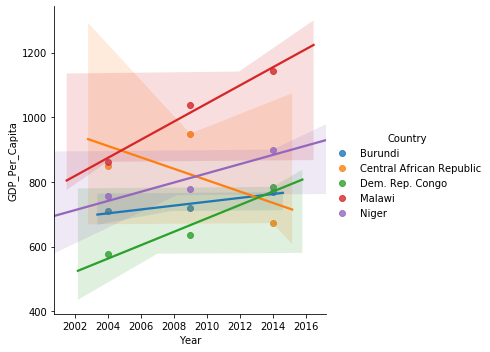

In [48]:
low5gdp = sns.lmplot(x="Year", y="GDP_Per_Capita", hue="Country", data= Low5gdp)